Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import missingno as msn
import sklearn


Reading the data

In [4]:
df=pd.read_csv("/content/Water_Quality.csv")

Basic Understanding of data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ph               96879 non-null   float64
 1   hardness         100000 non-null  float64
 2   tds              97616 non-null   float64
 3   chlorine         100000 non-null  float64
 4   sulfate          99187 non-null   float64
 5   conductivity     98402 non-null   float64
 6   organic_carbon   100000 non-null  float64
 7   trihalomethanes  100000 non-null  float64
 8   turbidity        100000 non-null  float64
 9   potability       100000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.6 MB


In [6]:
df.head()

ph  hardness     tds  chlorine  sulfate  conductivity  organic_carbon  \
0  7.14    440.98  614.26      2.12   208.39        350.92            7.22   
1  6.41    242.82  387.89      3.93   313.10        153.36            9.92   
2  6.29    133.09  225.55      1.46   332.04       1420.43            8.76   
3  7.39     71.89  459.23      0.56   609.63      24142.89            9.62   
4  6.31    273.01  308.99      0.64    52.59        196.85            1.05   

   trihalomethanes  turbidity  potability  
0            17.32       2.23           0  
1            20.69       2.07           0  
2            32.87       5.05           0  
3            42.80       2.26           0  
4           133.38       5.30           0

In [7]:
df["potability"].unique()

array([0, 1])

In [8]:
df["potability"].value_counts()

potability
0    92384
1     7616
Name: count, dtype: int64

finding missing values which column having visually

<Axes: >

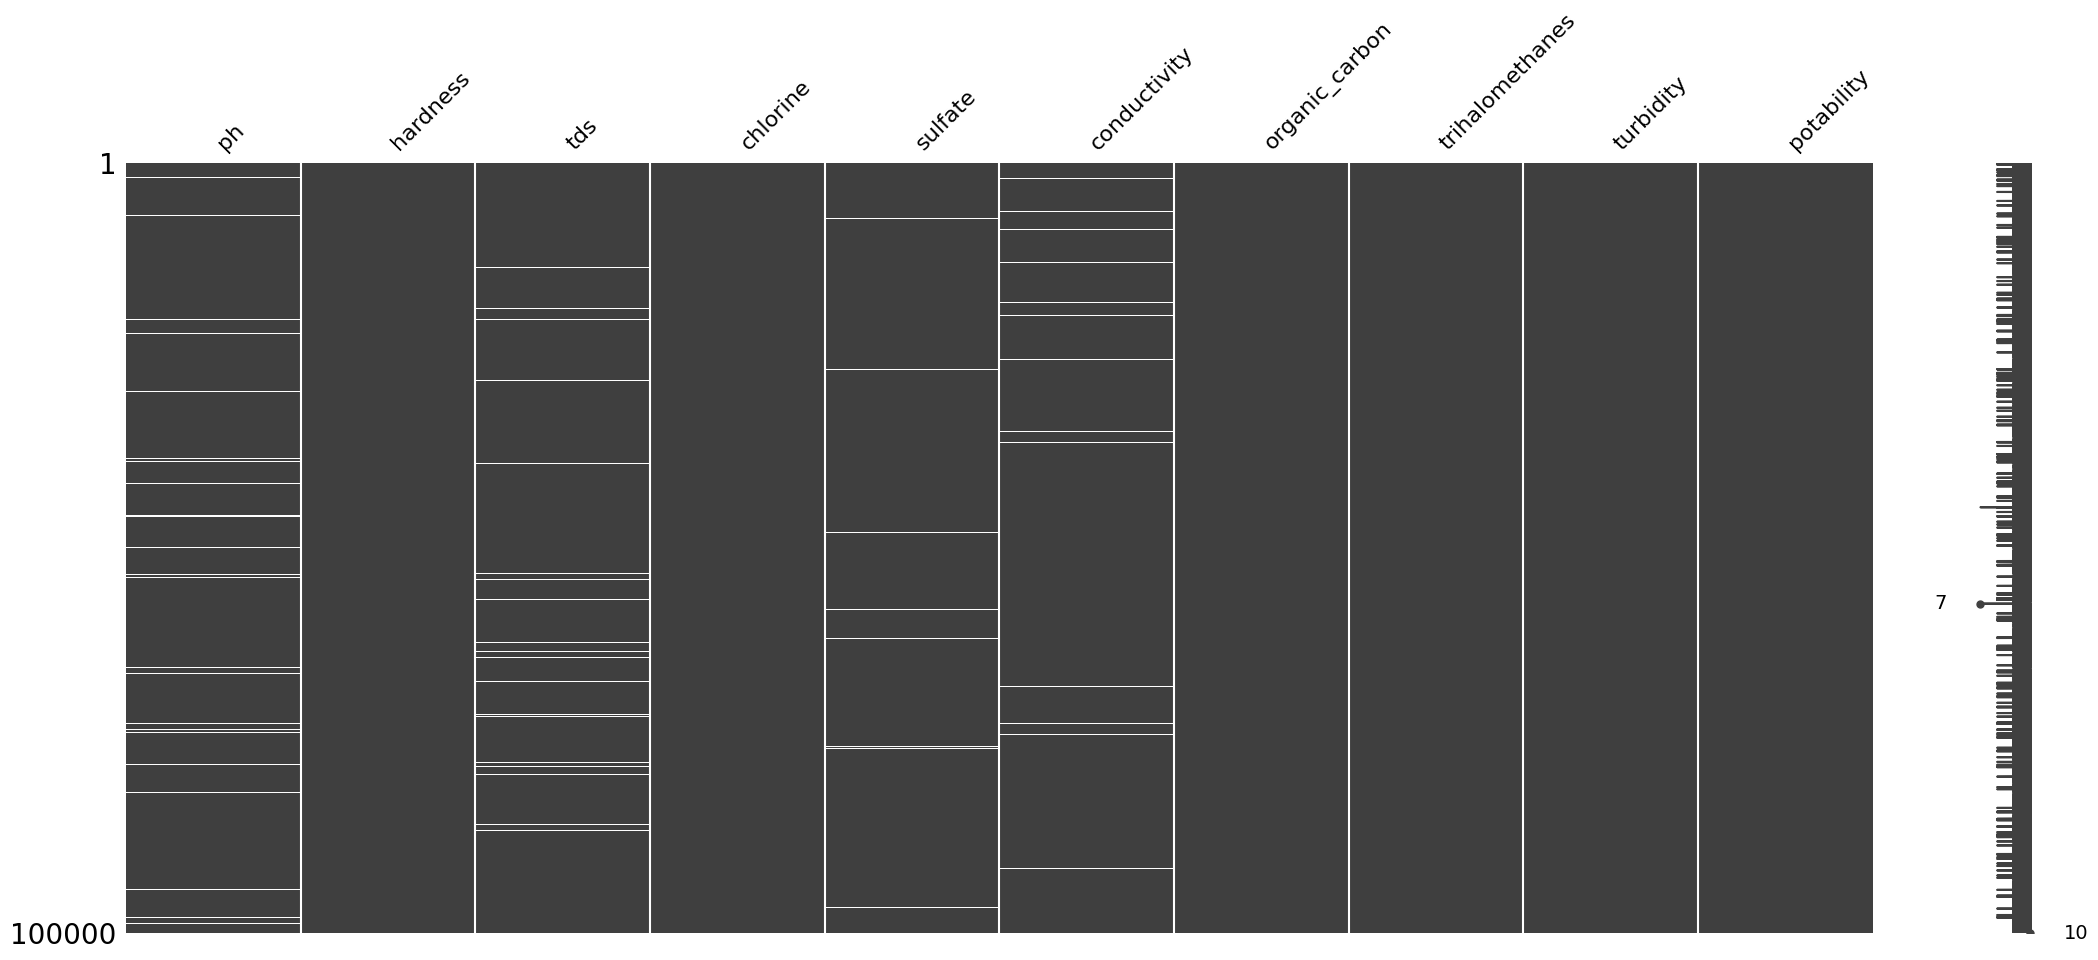

In [9]:
msn.matrix(df)

Finding percentage of null values in each column

In [10]:
df.isnull().sum()/len(df)*100

ph                 3.121
hardness           0.000
tds                2.384
chlorine           0.000
sulfate            0.813
conductivity       1.598
organic_carbon     0.000
trihalomethanes    0.000
turbidity          0.000
potability         0.000
dtype: float64

Checking the missing values column if they have outliers or not

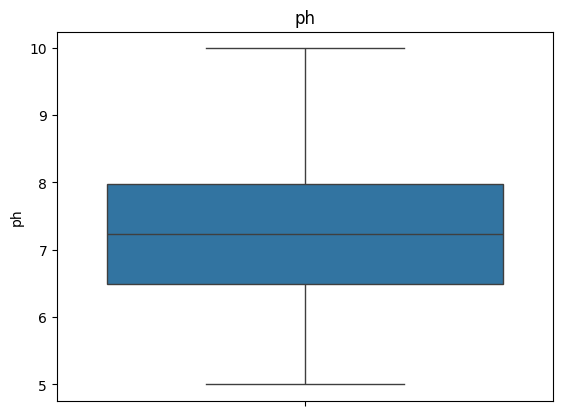

In [11]:
sns.boxplot(df["ph"])
plt.title("ph")
plt.show()

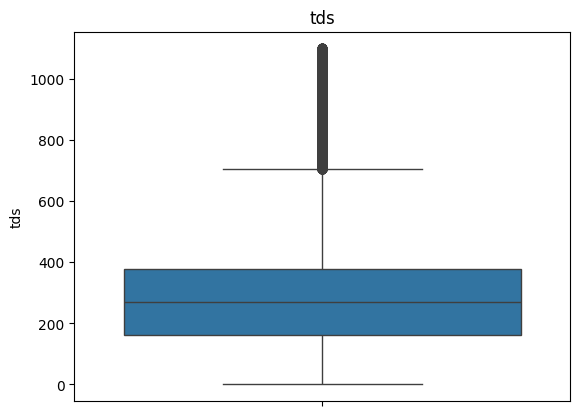

In [12]:
sns.boxplot(df["tds"])
plt.title("tds")
plt.show()

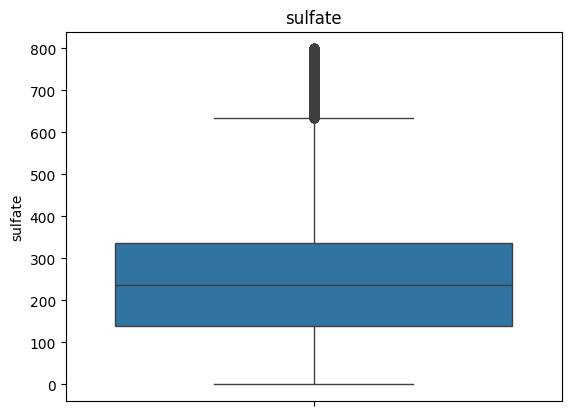

In [13]:
sns.boxplot(df["sulfate"])
plt.title("sulfate")
plt.show()


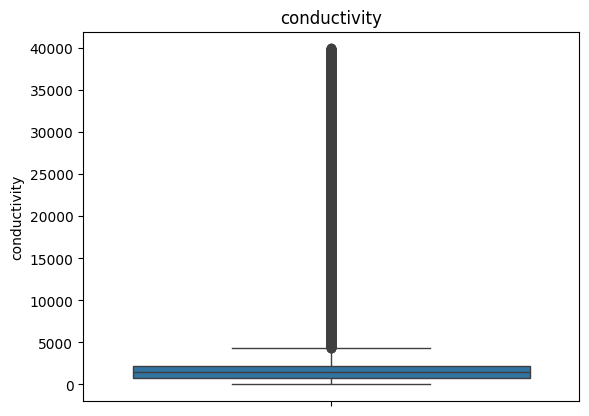

In [14]:
sns.boxplot(df["conductivity"])
plt.title("conductivity")
plt.show()

Filling the missing values with mean or mean

In [15]:
df["ph"]=df["ph"].fillna(df['ph'].mean())
df["tds"]=df["tds"].fillna(df['tds'].median())
df["sulfate"]=df["sulfate"].fillna(df['sulfate'].median())
df["conductivity"]=df["conductivity"].fillna(df['conductivity'].median())

Checking again if any column having null values

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ph               100000 non-null  float64
 1   hardness         100000 non-null  float64
 2   tds              100000 non-null  float64
 3   chlorine         100000 non-null  float64
 4   sulfate          100000 non-null  float64
 5   conductivity     100000 non-null  float64
 6   organic_carbon   100000 non-null  float64
 7   trihalomethanes  100000 non-null  float64
 8   turbidity        100000 non-null  float64
 9   potability       100000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 7.6 MB


Checking if any columns have duplicates

In [17]:
df.duplicated().sum()

np.int64(0)

In [18]:
y=df["potability"]
X=df.drop(columns=["potability"])


Checking the shape of the predictors and target columns

In [19]:
X.shape

(100000, 9)

In [20]:
y.shape

(100000,)

Splitting the data into train and test data

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

Printing the shape of the train and test data

In [22]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(80000, 9)
(20000, 9)
(80000,)
(20000,)


In [23]:
X_train.head()

ph  hardness      tds  chlorine  sulfate  conductivity  \
66534  8.23    564.32  1000.59      3.40    75.04        924.27   
6258   6.99    356.41   188.24      2.45   322.21       2659.67   
18736  7.40    735.84    30.79      1.30   348.84        298.80   
54710  7.31    133.93   171.67      3.32   364.58       2323.44   
68534  8.06     41.28   403.89      2.16   356.17        938.78   

       organic_carbon  trihalomethanes  turbidity  
66534            4.13            20.09       7.35  
6258             9.86             6.11       5.61  
18736            4.37           100.32       1.58  
54710            6.57             6.27       2.83  
68534            8.31            54.45       1.35

MIN MAX SCALER

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_norm=scaler.fit_transform(X_train)
X_test_norm=scaler.transform(X_test)

Checking the shape of the train and test data

In [25]:
X_train.shape

(80000, 9)

In [26]:
X_test.shape

(20000, 9)

In [27]:
type(X_train_norm)

numpy.ndarray

In [28]:
X_train_norm=pd.DataFrame(X_train_norm,columns=X_train.columns)
X_test_norm=pd.DataFrame(X_test_norm,columns=X_test.columns)

In [29]:
X_train_norm.head()

ph  hardness       tds  chlorine   sulfate  conductivity  \
0  0.647295  0.513010  0.909633  0.378198  0.093792      0.023128   
1  0.398798  0.323994  0.171106  0.272525  0.402770      0.066554   
2  0.480962  0.668943  0.027965  0.144605  0.436059      0.007476   
3  0.462926  0.121732  0.156042  0.369299  0.455735      0.058140   
4  0.613226  0.037501  0.367159  0.240267  0.445222      0.023491   

   organic_carbon  trihalomethanes  turbidity  
0        0.229572         0.087363   0.525375  
1        0.548082         0.026570   0.401001  
2        0.242913         0.436250   0.112938  
3        0.365203         0.027266   0.202287  
4        0.461923         0.236780   0.096497

In [30]:
type(X_train_norm)

pandas.core.frame.DataFrame

Creating a KDE PLOT

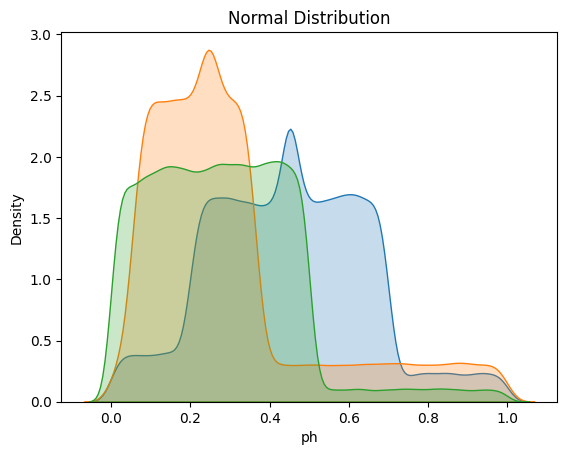

In [31]:
sns.kdeplot(X_train_norm,x="ph",fill=True)
sns.kdeplot(X_train_norm,x="tds", fill=True)
sns.kdeplot(X_train_norm,x="chlorine", fill=True)
plt.title("Normal Distribution")
plt.show()


Create kde plot with original data

<Axes: xlabel='ph', ylabel='Density'>

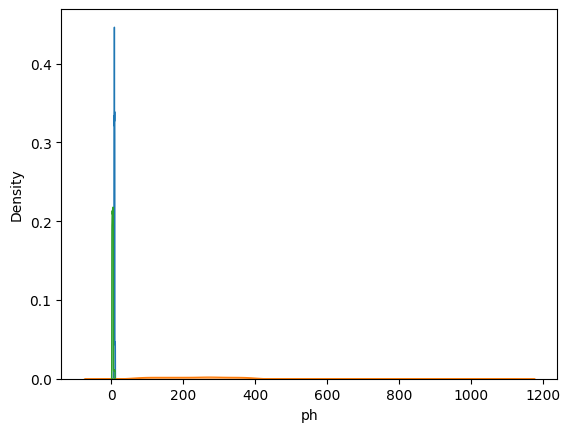

In [32]:
sns.kdeplot(X_train,x="ph", fill=True)
sns.kdeplot(X_train,x="tds", fill=True)
sns.kdeplot(X_train,x="chlorine", fill=True)

Standard scaler or standardization or Z-transform scaling

In [33]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_stand=scaler.fit_transform(X_train)
X_test_stand=scaler.transform(X_test)

In [34]:
X_train_stand=pd.DataFrame(X_train_stand,columns=X_train.columns)
X_test_stand=pd.DataFrame(X_test_stand,columns=X_test.columns)
X_train_stand.head()


ph  hardness       tds  chlorine   sulfate  conductivity  \
0  1.002414  1.148758  2.761018  0.555804 -1.167425     -0.269359   
1 -0.263682  0.213829 -0.577567 -0.031529  0.455374      0.170588   
2  0.154947  1.920048 -1.224653 -0.742511  0.630213     -0.427924   
3  0.063053 -0.786619 -0.645666  0.506344  0.733554      0.085349   
4  0.828836 -1.203247  0.308709 -0.210820  0.678338     -0.265680   

   organic_carbon  trihalomethanes  turbidity  
0       -0.875151        -1.044662   1.736939  
1        0.758210        -1.321965   1.018715  
2       -0.806738         0.546751  -0.644759  
3       -0.179619        -1.318791  -0.128793  
4        0.316376        -0.363110  -0.739696

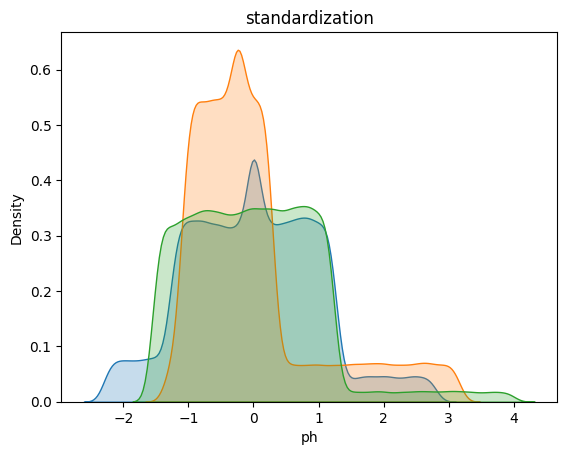

In [35]:
sns.kdeplot(X_train_stand,x="ph", fill=True)
sns.kdeplot(X_train_stand,x="tds", fill=True)
sns.kdeplot(X_train_stand,x="chlorine", fill=True)
plt.title("standardization")
plt.show()


Checking the mean and median

In [36]:
X_train_stand["ph"].mean()

np.float64(-3.144151605738443e-16)

In [37]:
X_train_stand["ph"].std()

1.0000062500585498

Robust Scaler

In [38]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train_robust=scaler.fit_transform(X_train)
X_test_robust=scaler.transform(X_test)

In [39]:
X_train_robust=pd.DataFrame(X_train_robust,columns=X_train.columns)
X_test_robust=pd.DataFrame(X_test_robust,columns=X_test.columns)

In [40]:
X_train_robust.head()

ph  hardness       tds  chlorine   sulfate  conductivity  \
0  0.680894  1.220572  3.434271  0.423077 -0.823473     -0.362032   
1 -0.180217  0.356486 -0.385138  0.017094  0.432856      0.859584   
2  0.104505  1.933420 -1.125417 -0.474359  0.568212     -0.802325   
3  0.042005 -0.568154 -0.463045  0.388889  0.648216      0.622898   
4  0.562839 -0.953213  0.628779 -0.106838  0.605469     -0.351818   

   organic_carbon  trihalomethanes  turbidity  
0       -0.617934        -0.633082   1.645614  
1        0.499025        -0.817929   1.035088  
2       -0.571150         0.427740  -0.378947  
3       -0.142300        -0.815814   0.059649  
4        0.196881        -0.178765  -0.459649

Text(0.5, 1.0, 'Kde plot with robust data')

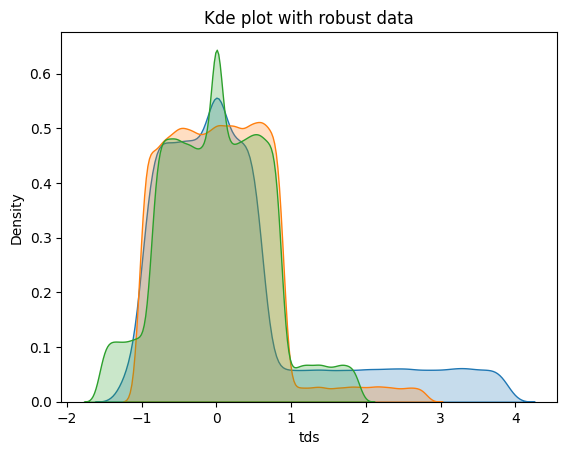

In [41]:
sns.kdeplot(X_train_robust,x="tds", fill=True)
sns.kdeplot(X_train_robust,x="chlorine", fill=True)
sns.kdeplot(X_train_robust,x="ph", fill=True)
plt.title("Kde plot with robust data")

Observations:
The common area under curve in robust is more than minmax scaler and standard scaler.
